In [1]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt

c:\anaconda\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
heart_disease = fetch_ucirepo(id=45)

In [3]:
X = heart_disease.data.features
y = heart_disease.data.targets
print('X type is ', type(X),'\n', 'y type is ',type(y))

X type is  <class 'pandas.core.frame.DataFrame'> 
 y type is  <class 'pandas.core.frame.DataFrame'>


In [4]:
print(X.head()) 

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  


In [5]:
X.iloc[:,0]

0      63
1      67
2      67
3      37
4      41
       ..
298    45
299    68
300    57
301    57
302    38
Name: age, Length: 303, dtype: int64

In [6]:
nan_indices = X[X.isna().any(axis=1)].index

X = X.drop(nan_indices)
y = y.drop(nan_indices)

In [7]:
print(X.shape)
print(y.shape)

(297, 13)
(297, 1)


In [8]:
print(y)

     num
0      0
1      2
2      1
3      0
4      0
..   ...
297    1
298    1
299    2
300    3
301    1

[297 rows x 1 columns]


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    int64  
 1   sex       297 non-null    int64  
 2   cp        297 non-null    int64  
 3   trestbps  297 non-null    int64  
 4   chol      297 non-null    int64  
 5   fbs       297 non-null    int64  
 6   restecg   297 non-null    int64  
 7   thalach   297 non-null    int64  
 8   exang     297 non-null    int64  
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    int64  
 11  ca        297 non-null    float64
 12  thal      297 non-null    float64
dtypes: float64(3), int64(10)
memory usage: 32.5 KB


In [10]:
X.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [11]:
y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   num     297 non-null    int64
dtypes: int64(1)
memory usage: 4.6 KB


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [13]:
model = LogisticRegression(random_state = 42, multi_class = 'multinomial')#, solver='lbfgs')#(max_iter=1000)
model.fit(X_train, y_train)


c:\anaconda\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='multinomial', random_state=42)

In [14]:
# предиктим на тестовой выборке
y_pred = model.predict(X_test)
print(type(y_test), y_pred.shape, y_test.shape)
y_both = y_test.copy()
y_both['pred'] = y_pred
#y_both['pred'] = pd.Series(y_pred)
#y_both = y_both.dropna()
y_both

<class 'pandas.core.frame.DataFrame'> (60,) (60, 1)


,num,pred
169,0,0
214,1,0
63,0,0
155,1,2
5,0,0
77,0,0
185,0,0
159,0,0
9,1,1
140,0,0


In [15]:
X.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

In [16]:
# предиктим для всех данных
y_pred_all = model.predict(X)
y_both = y.copy()
y_both['pred'] = y_pred_all#pd.Series(y_pred_all)
y_both

,num,pred
0,0,0
1,2,3
2,1,2
3,0,0
4,0,0
...,...,...
297,1,1
298,1,1
299,2,2
300,3,1


In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, 4)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [19]:
accuracy = accuracy_score(y_test, y_pred)

In [20]:
precision = precision_score(y_test, y_pred, average = 'weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average = 'weighted', zero_division=0)

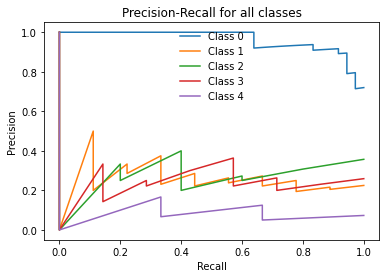

In [21]:
for i in range(y.nunique()[0]):
    precision_vals, recall_vals, _ = precision_recall_curve(y_test == i, model.predict_proba(X_test)[:, i])
    plt.plot(recall_vals, precision_vals, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall for all classes')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

In [22]:
f1 = f1_score(y_test, y_pred, average = 'weighted')

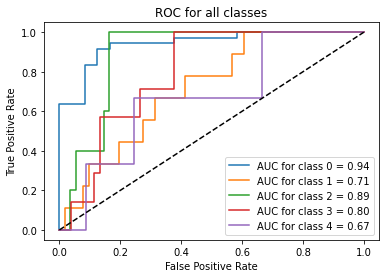

In [23]:
#roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1], multi_class='ovr')
aucs = []
for i in range(5):
    fpr, tpr, _ = roc_curve(y_test == i, model.predict_proba(X_test)[:, i])
    roc_auc = roc_auc_score(y_test == i, model.predict_proba(X_test)[:, i])
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, label=f'AUC for class {i} = {roc_auc:.2f}')

plt.plot([0, 1], [0, 1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for all classes')
plt.legend()
plt.show()

Confusion matrix, without normalization
[[35  0  0  1  0]
 [ 4  3  1  1  0]
 [ 0  2  1  2  0]
 [ 3  2  1  1  0]
 [ 2  0  1  0  0]]


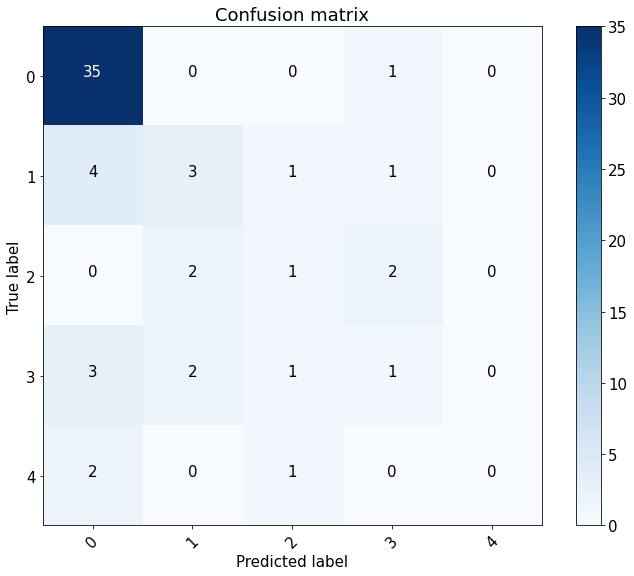

In [24]:
#Матрица КОНФУЦИЯ
font = {'size' : 15}
plt.rc('font', **font)

cnf_matrix = confusion_matrix(y_test, model.predict(X_test))
plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4],
                      title='Confusion matrix')
plt.show()

In [25]:
#Нормализованная матрица КОНФУЦИЯ
'''plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4],
                      title='Confusion matrix', normalize = True)
plt.show()'''

"plt.figure(figsize=(10, 8))\nplot_confusion_matrix(cnf_matrix, classes=[0,1,2,3,4],\n                      title='Confusion matrix', normalize = True)\nplt.show()"

In [26]:
print("Accuracy:", accuracy, " = ", str(round(accuracy * 100, 1))+"%")
print("Precision:", precision, " = ", str(round(precision * 100, 1))+"%")
print("Recall:", recall, " = ", str(round(recall * 100, 1))+"%")
print("F1 Score:", f1, " = ", str(round(f1 * 100, 1))+"%")
print("ROC AUC:", roc_auc, " = ", str(round(roc_auc * 100, 1))+"%")

Accuracy: 0.6666666666666666  =  66.7%
Precision: 0.5857251082251081  =  58.6%
Recall: 0.6666666666666666  =  66.7%
F1 Score: 0.619212962962963  =  61.9%
ROC AUC: 0.6666666666666667  =  66.7%


In [27]:
mean_auc = sum(aucs) / len(aucs)

In [28]:
gini = 2 * mean_auc - 1
gini

0.6023256885754111